In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [ ]:
1、Conv2D卷积层：padding = valid默认不填充 ；same填充后输出宽度和高度与输出相同；常用3*3窗口
2、MaxPooling2D池化层（混合层）：常用2*2窗口
3、网络架构问题：
    （1）最好的模型是：最后每个点都包含全部的信息
    （2）尽量减少参数：便于运算和降低过拟合
    （3）混合层最大值而不是平均值能给出更多信息


## 数据准备
`https://www.kaggle.com/c/dogs-vs-cats/data`

In [59]:
import os, shutil
original_dataset_dir = r'C:\Users\pengfeizhang\jupyter-static-dir\dogs-vs-cats\train\train'
base_dir = r'C:\cats_and_dogs_small'
os.mkdir(base_dir)
# ---------------------------------------------------
train_dir = os.path.join(base_dir, 'train')  # r'.\train'
os.mkdir(train_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
# ---------------------------------------------------
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
# ---------------------------------------------------
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

'C:\\cats_and_dogs_small\\train\\cats\\cat.0.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.1.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.2.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.3.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.4.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.5.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.6.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.7.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.8.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.9.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.10.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.11.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.12.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.13.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.14.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.15.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.16.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.17.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.18.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.19.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.20.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.21.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.22.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.23.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.24.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.25.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.26.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.27.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.28.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.29.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.30.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.31.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.32.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.33.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.34.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.35.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.36.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.37.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.38.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.39.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.40.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.41.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.42.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.43.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.44.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.45.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.46.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.47.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.48.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.49.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.50.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.51.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.52.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.53.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.54.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.55.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.56.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.57.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.58.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.59.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.60.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.61.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.62.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.63.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.64.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.65.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.66.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.67.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.68.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.69.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.70.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.71.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.72.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.73.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.74.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.75.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.76.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.77.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.78.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.79.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.80.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.81.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.82.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.83.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.84.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.85.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.86.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.87.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.88.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.89.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.90.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.91.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.92.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.93.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.94.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.95.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.96.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.97.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.98.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.99.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.100.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.101.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.102.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.103.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.104.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.105.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.106.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.107.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.108.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.109.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.110.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.111.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.112.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.113.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.114.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.115.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.116.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.117.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.118.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.119.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.120.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.121.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.122.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.123.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.124.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.125.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.126.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.127.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.128.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.129.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.130.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.131.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.132.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.133.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.134.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.135.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.136.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.137.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.138.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.139.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.140.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.141.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.142.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.143.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.144.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.145.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.146.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.147.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.148.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.149.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.150.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.151.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.152.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.153.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.154.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.155.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.156.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.157.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.158.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.159.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.160.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.161.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.162.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.163.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.164.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.165.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.166.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.167.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.168.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.169.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.170.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.171.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.172.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.173.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.174.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.175.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.176.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.177.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.178.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.179.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.180.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.181.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.182.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.183.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.184.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.185.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.186.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.187.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.188.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.189.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.190.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.191.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.192.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.193.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.194.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.195.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.196.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.197.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.198.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.199.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.200.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.201.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.202.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.203.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.204.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.205.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.206.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.207.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.208.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.209.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.210.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.211.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.212.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.213.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.214.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.215.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.216.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.217.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.218.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.219.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.220.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.221.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.222.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.223.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.224.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.225.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.226.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.227.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.228.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.229.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.230.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.231.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.232.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.233.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.234.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.235.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.236.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.237.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.238.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.239.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.240.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.241.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.242.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.243.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.244.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.245.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.246.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.247.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.248.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.249.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.250.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.251.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.252.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.253.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.254.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.255.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.256.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.257.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.258.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.259.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.260.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.261.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.262.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.263.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.264.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.265.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.266.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.267.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.268.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.269.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.270.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.271.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.272.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.273.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.274.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.275.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.276.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.277.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.278.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.279.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.280.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.281.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.282.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.283.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.284.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.285.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.286.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.287.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.288.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.289.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.290.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.291.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.292.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.293.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.294.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.295.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.296.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.297.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.298.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.299.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.300.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.301.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.302.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.303.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.304.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.305.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.306.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.307.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.308.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.309.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.310.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.311.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.312.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.313.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.314.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.315.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.316.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.317.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.318.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.319.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.320.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.321.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.322.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.323.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.324.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.325.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.326.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.327.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.328.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.329.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.330.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.331.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.332.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.333.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.334.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.335.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.336.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.337.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.338.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.339.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.340.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.341.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.342.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.343.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.344.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.345.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.346.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.347.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.348.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.349.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.350.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.351.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.352.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.353.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.354.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.355.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.356.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.357.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.358.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.359.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.360.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.361.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.362.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.363.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.364.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.365.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.366.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.367.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.368.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.369.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.370.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.371.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.372.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.373.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.374.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.375.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.376.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.377.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.378.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.379.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.380.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.381.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.382.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.383.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.384.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.385.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.386.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.387.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.388.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.389.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.390.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.391.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.392.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.393.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.394.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.395.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.396.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.397.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.398.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.399.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.400.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.401.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.402.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.403.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.404.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.405.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.406.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.407.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.408.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.409.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.410.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.411.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.412.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.413.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.414.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.415.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.416.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.417.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.418.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.419.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.420.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.421.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.422.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.423.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.424.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.425.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.426.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.427.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.428.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.429.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.430.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.431.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.432.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.433.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.434.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.435.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.436.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.437.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.438.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.439.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.440.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.441.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.442.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.443.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.444.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.445.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.446.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.447.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.448.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.449.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.450.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.451.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.452.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.453.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.454.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.455.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.456.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.457.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.458.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.459.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.460.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.461.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.462.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.463.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.464.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.465.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.466.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.467.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.468.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.469.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.470.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.471.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.472.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.473.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.474.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.475.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.476.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.477.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.478.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.479.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.480.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.481.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.482.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.483.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.484.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.485.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.486.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.487.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.488.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.489.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.490.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.491.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.492.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.493.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.494.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.495.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.496.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.497.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.498.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.499.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.500.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.501.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.502.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.503.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.504.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.505.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.506.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.507.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.508.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.509.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.510.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.511.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.512.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.513.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.514.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.515.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.516.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.517.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.518.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.519.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.520.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.521.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.522.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.523.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.524.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.525.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.526.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.527.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.528.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.529.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.530.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.531.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.532.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.533.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.534.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.535.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.536.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.537.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.538.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.539.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.540.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.541.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.542.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.543.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.544.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.545.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.546.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.547.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.548.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.549.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.550.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.551.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.552.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.553.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.554.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.555.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.556.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.557.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.558.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.559.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.560.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.561.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.562.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.563.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.564.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.565.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.566.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.567.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.568.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.569.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.570.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.571.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.572.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.573.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.574.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.575.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.576.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.577.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.578.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.579.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.580.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.581.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.582.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.583.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.584.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.585.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.586.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.587.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.588.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.589.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.590.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.591.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.592.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.593.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.594.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.595.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.596.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.597.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.598.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.599.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.600.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.601.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.602.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.603.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.604.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.605.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.606.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.607.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.608.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.609.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.610.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.611.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.612.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.613.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.614.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.615.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.616.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.617.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.618.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.619.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.620.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.621.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.622.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.623.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.624.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.625.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.626.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.627.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.628.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.629.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.630.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.631.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.632.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.633.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.634.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.635.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.636.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.637.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.638.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.639.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.640.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.641.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.642.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.643.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.644.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.645.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.646.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.647.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.648.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.649.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.650.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.651.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.652.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.653.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.654.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.655.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.656.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.657.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.658.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.659.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.660.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.661.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.662.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.663.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.664.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.665.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.666.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.667.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.668.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.669.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.670.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.671.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.672.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.673.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.674.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.675.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.676.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.677.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.678.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.679.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.680.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.681.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.682.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.683.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.684.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.685.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.686.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.687.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.688.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.689.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.690.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.691.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.692.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.693.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.694.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.695.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.696.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.697.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.698.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.699.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.700.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.701.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.702.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.703.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.704.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.705.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.706.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.707.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.708.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.709.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.710.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.711.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.712.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.713.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.714.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.715.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.716.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.717.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.718.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.719.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.720.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.721.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.722.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.723.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.724.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.725.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.726.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.727.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.728.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.729.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.730.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.731.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.732.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.733.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.734.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.735.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.736.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.737.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.738.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.739.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.740.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.741.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.742.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.743.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.744.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.745.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.746.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.747.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.748.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.749.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.750.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.751.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.752.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.753.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.754.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.755.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.756.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.757.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.758.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.759.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.760.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.761.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.762.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.763.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.764.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.765.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.766.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.767.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.768.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.769.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.770.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.771.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.772.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.773.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.774.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.775.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.776.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.777.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.778.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.779.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.780.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.781.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.782.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.783.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.784.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.785.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.786.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.787.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.788.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.789.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.790.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.791.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.792.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.793.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.794.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.795.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.796.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.797.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.798.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.799.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.800.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.801.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.802.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.803.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.804.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.805.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.806.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.807.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.808.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.809.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.810.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.811.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.812.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.813.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.814.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.815.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.816.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.817.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.818.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.819.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.820.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.821.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.822.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.823.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.824.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.825.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.826.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.827.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.828.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.829.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.830.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.831.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.832.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.833.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.834.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.835.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.836.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.837.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.838.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.839.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.840.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.841.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.842.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.843.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.844.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.845.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.846.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.847.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.848.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.849.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.850.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.851.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.852.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.853.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.854.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.855.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.856.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.857.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.858.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.859.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.860.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.861.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.862.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.863.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.864.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.865.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.866.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.867.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.868.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.869.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.870.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.871.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.872.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.873.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.874.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.875.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.876.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.877.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.878.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.879.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.880.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.881.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.882.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.883.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.884.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.885.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.886.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.887.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.888.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.889.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.890.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.891.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.892.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.893.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.894.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.895.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.896.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.897.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.898.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.899.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.900.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.901.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.902.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.903.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.904.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.905.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.906.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.907.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.908.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.909.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.910.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.911.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.912.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.913.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.914.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.915.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.916.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.917.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.918.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.919.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.920.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.921.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.922.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.923.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.924.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.925.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.926.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.927.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.928.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.929.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.930.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.931.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.932.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.933.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.934.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.935.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.936.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.937.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.938.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.939.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.940.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.941.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.942.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.943.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.944.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.945.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.946.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.947.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.948.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.949.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.950.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.951.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.952.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.953.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.954.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.955.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.956.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.957.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.958.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.959.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.960.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.961.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.962.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.963.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.964.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.965.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.966.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.967.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.968.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.969.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.970.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.971.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.972.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.973.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.974.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.975.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.976.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.977.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.978.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.979.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.980.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.981.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.982.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.983.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.984.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.985.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.986.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.987.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.988.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.989.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.990.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.991.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.992.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.993.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.994.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.995.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.996.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.997.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.998.jpg'

'C:\\cats_and_dogs_small\\train\\cats\\cat.999.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.0.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.1.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.2.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.3.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.4.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.5.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.6.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.7.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.8.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.9.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.10.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.11.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.12.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.13.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.14.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.15.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.16.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.17.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.18.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.19.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.20.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.21.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.22.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.23.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.24.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.25.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.26.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.27.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.28.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.29.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.30.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.31.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.32.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.33.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.34.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.35.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.36.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.37.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.38.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.39.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.40.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.41.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.42.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.43.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.44.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.45.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.46.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.47.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.48.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.49.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.50.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.51.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.52.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.53.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.54.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.55.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.56.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.57.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.58.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.59.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.60.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.61.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.62.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.63.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.64.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.65.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.66.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.67.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.68.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.69.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.70.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.71.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.72.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.73.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.74.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.75.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.76.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.77.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.78.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.79.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.80.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.81.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.82.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.83.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.84.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.85.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.86.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.87.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.88.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.89.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.90.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.91.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.92.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.93.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.94.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.95.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.96.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.97.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.98.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.99.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.100.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.101.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.102.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.103.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.104.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.105.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.106.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.107.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.108.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.109.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.110.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.111.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.112.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.113.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.114.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.115.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.116.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.117.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.118.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.119.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.120.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.121.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.122.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.123.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.124.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.125.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.126.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.127.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.128.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.129.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.130.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.131.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.132.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.133.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.134.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.135.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.136.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.137.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.138.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.139.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.140.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.141.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.142.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.143.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.144.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.145.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.146.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.147.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.148.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.149.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.150.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.151.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.152.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.153.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.154.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.155.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.156.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.157.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.158.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.159.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.160.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.161.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.162.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.163.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.164.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.165.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.166.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.167.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.168.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.169.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.170.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.171.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.172.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.173.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.174.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.175.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.176.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.177.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.178.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.179.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.180.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.181.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.182.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.183.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.184.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.185.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.186.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.187.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.188.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.189.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.190.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.191.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.192.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.193.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.194.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.195.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.196.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.197.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.198.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.199.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.200.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.201.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.202.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.203.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.204.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.205.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.206.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.207.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.208.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.209.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.210.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.211.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.212.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.213.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.214.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.215.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.216.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.217.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.218.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.219.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.220.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.221.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.222.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.223.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.224.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.225.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.226.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.227.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.228.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.229.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.230.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.231.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.232.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.233.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.234.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.235.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.236.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.237.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.238.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.239.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.240.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.241.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.242.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.243.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.244.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.245.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.246.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.247.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.248.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.249.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.250.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.251.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.252.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.253.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.254.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.255.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.256.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.257.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.258.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.259.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.260.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.261.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.262.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.263.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.264.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.265.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.266.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.267.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.268.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.269.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.270.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.271.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.272.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.273.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.274.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.275.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.276.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.277.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.278.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.279.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.280.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.281.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.282.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.283.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.284.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.285.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.286.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.287.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.288.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.289.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.290.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.291.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.292.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.293.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.294.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.295.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.296.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.297.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.298.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.299.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.300.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.301.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.302.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.303.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.304.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.305.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.306.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.307.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.308.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.309.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.310.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.311.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.312.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.313.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.314.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.315.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.316.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.317.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.318.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.319.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.320.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.321.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.322.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.323.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.324.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.325.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.326.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.327.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.328.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.329.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.330.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.331.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.332.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.333.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.334.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.335.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.336.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.337.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.338.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.339.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.340.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.341.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.342.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.343.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.344.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.345.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.346.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.347.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.348.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.349.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.350.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.351.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.352.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.353.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.354.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.355.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.356.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.357.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.358.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.359.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.360.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.361.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.362.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.363.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.364.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.365.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.366.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.367.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.368.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.369.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.370.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.371.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.372.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.373.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.374.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.375.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.376.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.377.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.378.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.379.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.380.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.381.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.382.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.383.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.384.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.385.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.386.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.387.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.388.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.389.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.390.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.391.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.392.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.393.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.394.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.395.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.396.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.397.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.398.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.399.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.400.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.401.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.402.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.403.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.404.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.405.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.406.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.407.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.408.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.409.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.410.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.411.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.412.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.413.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.414.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.415.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.416.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.417.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.418.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.419.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.420.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.421.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.422.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.423.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.424.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.425.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.426.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.427.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.428.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.429.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.430.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.431.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.432.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.433.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.434.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.435.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.436.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.437.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.438.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.439.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.440.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.441.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.442.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.443.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.444.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.445.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.446.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.447.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.448.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.449.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.450.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.451.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.452.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.453.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.454.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.455.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.456.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.457.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.458.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.459.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.460.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.461.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.462.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.463.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.464.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.465.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.466.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.467.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.468.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.469.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.470.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.471.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.472.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.473.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.474.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.475.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.476.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.477.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.478.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.479.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.480.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.481.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.482.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.483.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.484.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.485.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.486.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.487.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.488.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.489.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.490.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.491.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.492.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.493.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.494.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.495.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.496.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.497.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.498.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.499.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.500.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.501.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.502.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.503.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.504.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.505.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.506.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.507.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.508.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.509.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.510.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.511.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.512.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.513.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.514.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.515.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.516.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.517.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.518.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.519.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.520.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.521.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.522.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.523.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.524.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.525.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.526.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.527.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.528.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.529.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.530.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.531.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.532.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.533.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.534.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.535.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.536.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.537.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.538.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.539.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.540.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.541.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.542.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.543.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.544.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.545.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.546.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.547.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.548.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.549.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.550.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.551.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.552.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.553.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.554.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.555.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.556.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.557.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.558.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.559.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.560.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.561.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.562.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.563.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.564.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.565.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.566.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.567.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.568.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.569.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.570.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.571.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.572.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.573.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.574.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.575.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.576.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.577.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.578.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.579.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.580.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.581.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.582.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.583.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.584.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.585.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.586.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.587.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.588.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.589.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.590.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.591.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.592.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.593.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.594.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.595.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.596.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.597.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.598.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.599.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.600.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.601.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.602.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.603.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.604.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.605.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.606.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.607.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.608.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.609.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.610.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.611.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.612.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.613.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.614.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.615.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.616.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.617.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.618.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.619.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.620.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.621.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.622.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.623.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.624.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.625.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.626.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.627.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.628.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.629.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.630.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.631.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.632.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.633.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.634.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.635.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.636.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.637.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.638.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.639.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.640.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.641.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.642.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.643.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.644.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.645.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.646.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.647.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.648.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.649.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.650.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.651.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.652.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.653.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.654.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.655.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.656.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.657.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.658.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.659.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.660.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.661.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.662.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.663.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.664.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.665.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.666.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.667.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.668.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.669.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.670.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.671.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.672.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.673.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.674.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.675.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.676.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.677.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.678.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.679.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.680.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.681.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.682.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.683.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.684.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.685.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.686.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.687.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.688.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.689.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.690.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.691.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.692.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.693.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.694.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.695.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.696.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.697.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.698.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.699.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.700.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.701.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.702.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.703.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.704.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.705.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.706.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.707.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.708.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.709.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.710.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.711.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.712.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.713.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.714.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.715.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.716.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.717.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.718.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.719.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.720.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.721.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.722.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.723.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.724.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.725.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.726.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.727.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.728.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.729.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.730.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.731.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.732.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.733.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.734.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.735.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.736.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.737.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.738.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.739.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.740.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.741.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.742.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.743.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.744.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.745.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.746.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.747.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.748.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.749.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.750.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.751.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.752.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.753.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.754.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.755.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.756.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.757.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.758.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.759.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.760.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.761.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.762.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.763.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.764.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.765.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.766.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.767.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.768.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.769.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.770.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.771.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.772.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.773.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.774.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.775.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.776.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.777.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.778.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.779.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.780.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.781.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.782.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.783.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.784.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.785.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.786.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.787.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.788.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.789.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.790.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.791.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.792.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.793.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.794.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.795.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.796.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.797.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.798.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.799.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.800.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.801.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.802.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.803.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.804.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.805.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.806.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.807.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.808.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.809.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.810.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.811.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.812.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.813.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.814.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.815.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.816.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.817.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.818.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.819.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.820.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.821.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.822.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.823.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.824.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.825.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.826.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.827.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.828.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.829.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.830.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.831.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.832.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.833.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.834.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.835.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.836.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.837.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.838.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.839.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.840.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.841.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.842.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.843.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.844.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.845.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.846.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.847.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.848.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.849.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.850.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.851.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.852.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.853.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.854.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.855.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.856.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.857.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.858.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.859.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.860.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.861.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.862.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.863.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.864.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.865.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.866.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.867.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.868.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.869.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.870.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.871.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.872.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.873.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.874.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.875.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.876.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.877.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.878.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.879.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.880.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.881.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.882.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.883.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.884.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.885.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.886.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.887.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.888.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.889.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.890.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.891.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.892.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.893.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.894.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.895.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.896.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.897.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.898.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.899.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.900.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.901.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.902.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.903.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.904.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.905.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.906.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.907.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.908.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.909.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.910.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.911.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.912.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.913.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.914.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.915.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.916.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.917.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.918.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.919.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.920.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.921.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.922.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.923.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.924.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.925.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.926.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.927.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.928.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.929.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.930.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.931.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.932.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.933.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.934.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.935.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.936.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.937.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.938.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.939.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.940.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.941.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.942.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.943.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.944.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.945.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.946.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.947.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.948.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.949.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.950.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.951.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.952.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.953.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.954.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.955.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.956.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.957.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.958.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.959.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.960.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.961.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.962.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.963.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.964.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.965.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.966.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.967.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.968.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.969.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.970.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.971.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.972.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.973.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.974.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.975.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.976.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.977.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.978.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.979.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.980.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.981.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.982.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.983.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.984.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.985.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.986.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.987.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.988.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.989.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.990.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.991.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.992.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.993.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.994.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.995.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.996.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.997.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.998.jpg'

'C:\\cats_and_dogs_small\\train\\dogs\\dog.999.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1000.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1001.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1002.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1003.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1004.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1005.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1006.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1007.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1008.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1009.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1010.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1011.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1012.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1013.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1014.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1015.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1016.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1017.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1018.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1019.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1020.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1021.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1022.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1023.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1024.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1025.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1026.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1027.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1028.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1029.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1030.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1031.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1032.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1033.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1034.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1035.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1036.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1037.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1038.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1039.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1040.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1041.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1042.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1043.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1044.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1045.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1046.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1047.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1048.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1049.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1050.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1051.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1052.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1053.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1054.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1055.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1056.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1057.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1058.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1059.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1060.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1061.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1062.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1063.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1064.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1065.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1066.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1067.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1068.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1069.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1070.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1071.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1072.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1073.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1074.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1075.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1076.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1077.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1078.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1079.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1080.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1081.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1082.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1083.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1084.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1085.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1086.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1087.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1088.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1089.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1090.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1091.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1092.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1093.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1094.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1095.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1096.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1097.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1098.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1099.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1100.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1101.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1102.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1103.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1104.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1105.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1106.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1107.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1108.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1109.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1110.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1111.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1112.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1113.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1114.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1115.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1116.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1117.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1118.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1119.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1120.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1121.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1122.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1123.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1124.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1125.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1126.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1127.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1128.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1129.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1130.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1131.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1132.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1133.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1134.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1135.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1136.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1137.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1138.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1139.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1140.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1141.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1142.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1143.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1144.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1145.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1146.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1147.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1148.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1149.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1150.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1151.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1152.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1153.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1154.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1155.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1156.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1157.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1158.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1159.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1160.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1161.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1162.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1163.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1164.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1165.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1166.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1167.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1168.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1169.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1170.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1171.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1172.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1173.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1174.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1175.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1176.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1177.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1178.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1179.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1180.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1181.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1182.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1183.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1184.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1185.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1186.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1187.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1188.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1189.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1190.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1191.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1192.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1193.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1194.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1195.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1196.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1197.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1198.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1199.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1200.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1201.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1202.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1203.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1204.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1205.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1206.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1207.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1208.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1209.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1210.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1211.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1212.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1213.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1214.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1215.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1216.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1217.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1218.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1219.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1220.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1221.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1222.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1223.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1224.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1225.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1226.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1227.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1228.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1229.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1230.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1231.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1232.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1233.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1234.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1235.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1236.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1237.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1238.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1239.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1240.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1241.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1242.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1243.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1244.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1245.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1246.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1247.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1248.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1249.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1250.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1251.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1252.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1253.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1254.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1255.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1256.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1257.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1258.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1259.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1260.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1261.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1262.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1263.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1264.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1265.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1266.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1267.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1268.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1269.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1270.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1271.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1272.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1273.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1274.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1275.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1276.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1277.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1278.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1279.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1280.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1281.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1282.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1283.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1284.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1285.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1286.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1287.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1288.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1289.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1290.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1291.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1292.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1293.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1294.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1295.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1296.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1297.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1298.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1299.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1300.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1301.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1302.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1303.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1304.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1305.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1306.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1307.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1308.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1309.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1310.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1311.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1312.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1313.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1314.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1315.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1316.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1317.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1318.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1319.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1320.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1321.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1322.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1323.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1324.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1325.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1326.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1327.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1328.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1329.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1330.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1331.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1332.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1333.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1334.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1335.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1336.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1337.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1338.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1339.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1340.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1341.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1342.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1343.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1344.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1345.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1346.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1347.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1348.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1349.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1350.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1351.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1352.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1353.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1354.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1355.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1356.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1357.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1358.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1359.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1360.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1361.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1362.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1363.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1364.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1365.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1366.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1367.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1368.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1369.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1370.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1371.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1372.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1373.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1374.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1375.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1376.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1377.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1378.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1379.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1380.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1381.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1382.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1383.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1384.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1385.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1386.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1387.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1388.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1389.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1390.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1391.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1392.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1393.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1394.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1395.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1396.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1397.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1398.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1399.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1400.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1401.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1402.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1403.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1404.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1405.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1406.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1407.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1408.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1409.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1410.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1411.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1412.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1413.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1414.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1415.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1416.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1417.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1418.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1419.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1420.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1421.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1422.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1423.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1424.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1425.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1426.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1427.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1428.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1429.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1430.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1431.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1432.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1433.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1434.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1435.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1436.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1437.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1438.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1439.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1440.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1441.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1442.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1443.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1444.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1445.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1446.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1447.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1448.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1449.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1450.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1451.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1452.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1453.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1454.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1455.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1456.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1457.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1458.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1459.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1460.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1461.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1462.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1463.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1464.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1465.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1466.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1467.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1468.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1469.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1470.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1471.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1472.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1473.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1474.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1475.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1476.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1477.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1478.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1479.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1480.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1481.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1482.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1483.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1484.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1485.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1486.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1487.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1488.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1489.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1490.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1491.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1492.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1493.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1494.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1495.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1496.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1497.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1498.jpg'

'C:\\cats_and_dogs_small\\validation\\cats\\cat.1499.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1000.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1001.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1002.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1003.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1004.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1005.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1006.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1007.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1008.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1009.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1010.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1011.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1012.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1013.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1014.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1015.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1016.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1017.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1018.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1019.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1020.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1021.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1022.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1023.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1024.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1025.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1026.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1027.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1028.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1029.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1030.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1031.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1032.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1033.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1034.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1035.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1036.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1037.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1038.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1039.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1040.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1041.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1042.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1043.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1044.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1045.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1046.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1047.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1048.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1049.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1050.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1051.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1052.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1053.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1054.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1055.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1056.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1057.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1058.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1059.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1060.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1061.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1062.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1063.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1064.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1065.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1066.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1067.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1068.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1069.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1070.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1071.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1072.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1073.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1074.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1075.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1076.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1077.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1078.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1079.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1080.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1081.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1082.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1083.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1084.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1085.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1086.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1087.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1088.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1089.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1090.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1091.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1092.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1093.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1094.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1095.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1096.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1097.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1098.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1099.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1100.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1101.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1102.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1103.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1104.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1105.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1106.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1107.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1108.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1109.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1110.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1111.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1112.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1113.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1114.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1115.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1116.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1117.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1118.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1119.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1120.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1121.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1122.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1123.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1124.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1125.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1126.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1127.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1128.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1129.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1130.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1131.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1132.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1133.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1134.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1135.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1136.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1137.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1138.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1139.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1140.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1141.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1142.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1143.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1144.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1145.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1146.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1147.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1148.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1149.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1150.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1151.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1152.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1153.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1154.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1155.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1156.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1157.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1158.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1159.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1160.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1161.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1162.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1163.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1164.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1165.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1166.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1167.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1168.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1169.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1170.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1171.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1172.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1173.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1174.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1175.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1176.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1177.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1178.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1179.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1180.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1181.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1182.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1183.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1184.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1185.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1186.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1187.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1188.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1189.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1190.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1191.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1192.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1193.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1194.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1195.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1196.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1197.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1198.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1199.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1200.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1201.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1202.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1203.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1204.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1205.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1206.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1207.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1208.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1209.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1210.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1211.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1212.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1213.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1214.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1215.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1216.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1217.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1218.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1219.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1220.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1221.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1222.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1223.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1224.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1225.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1226.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1227.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1228.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1229.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1230.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1231.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1232.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1233.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1234.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1235.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1236.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1237.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1238.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1239.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1240.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1241.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1242.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1243.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1244.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1245.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1246.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1247.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1248.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1249.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1250.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1251.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1252.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1253.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1254.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1255.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1256.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1257.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1258.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1259.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1260.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1261.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1262.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1263.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1264.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1265.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1266.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1267.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1268.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1269.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1270.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1271.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1272.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1273.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1274.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1275.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1276.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1277.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1278.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1279.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1280.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1281.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1282.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1283.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1284.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1285.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1286.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1287.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1288.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1289.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1290.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1291.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1292.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1293.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1294.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1295.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1296.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1297.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1298.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1299.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1300.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1301.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1302.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1303.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1304.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1305.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1306.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1307.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1308.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1309.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1310.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1311.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1312.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1313.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1314.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1315.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1316.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1317.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1318.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1319.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1320.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1321.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1322.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1323.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1324.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1325.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1326.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1327.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1328.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1329.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1330.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1331.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1332.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1333.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1334.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1335.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1336.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1337.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1338.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1339.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1340.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1341.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1342.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1343.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1344.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1345.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1346.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1347.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1348.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1349.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1350.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1351.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1352.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1353.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1354.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1355.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1356.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1357.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1358.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1359.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1360.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1361.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1362.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1363.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1364.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1365.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1366.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1367.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1368.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1369.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1370.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1371.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1372.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1373.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1374.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1375.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1376.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1377.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1378.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1379.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1380.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1381.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1382.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1383.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1384.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1385.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1386.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1387.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1388.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1389.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1390.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1391.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1392.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1393.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1394.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1395.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1396.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1397.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1398.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1399.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1400.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1401.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1402.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1403.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1404.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1405.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1406.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1407.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1408.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1409.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1410.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1411.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1412.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1413.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1414.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1415.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1416.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1417.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1418.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1419.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1420.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1421.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1422.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1423.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1424.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1425.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1426.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1427.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1428.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1429.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1430.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1431.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1432.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1433.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1434.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1435.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1436.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1437.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1438.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1439.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1440.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1441.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1442.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1443.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1444.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1445.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1446.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1447.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1448.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1449.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1450.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1451.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1452.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1453.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1454.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1455.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1456.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1457.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1458.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1459.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1460.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1461.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1462.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1463.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1464.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1465.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1466.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1467.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1468.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1469.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1470.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1471.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1472.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1473.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1474.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1475.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1476.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1477.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1478.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1479.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1480.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1481.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1482.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1483.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1484.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1485.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1486.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1487.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1488.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1489.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1490.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1491.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1492.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1493.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1494.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1495.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1496.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1497.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1498.jpg'

'C:\\cats_and_dogs_small\\validation\\dogs\\dog.1499.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1500.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1501.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1502.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1503.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1504.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1505.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1506.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1507.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1508.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1509.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1510.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1511.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1512.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1513.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1514.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1515.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1516.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1517.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1518.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1519.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1520.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1521.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1522.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1523.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1524.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1525.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1526.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1527.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1528.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1529.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1530.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1531.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1532.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1533.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1534.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1535.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1536.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1537.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1538.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1539.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1540.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1541.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1542.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1543.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1544.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1545.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1546.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1547.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1548.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1549.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1550.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1551.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1552.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1553.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1554.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1555.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1556.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1557.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1558.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1559.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1560.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1561.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1562.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1563.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1564.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1565.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1566.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1567.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1568.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1569.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1570.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1571.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1572.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1573.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1574.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1575.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1576.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1577.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1578.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1579.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1580.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1581.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1582.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1583.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1584.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1585.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1586.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1587.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1588.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1589.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1590.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1591.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1592.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1593.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1594.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1595.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1596.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1597.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1598.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1599.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1600.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1601.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1602.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1603.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1604.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1605.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1606.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1607.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1608.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1609.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1610.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1611.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1612.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1613.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1614.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1615.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1616.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1617.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1618.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1619.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1620.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1621.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1622.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1623.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1624.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1625.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1626.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1627.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1628.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1629.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1630.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1631.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1632.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1633.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1634.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1635.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1636.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1637.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1638.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1639.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1640.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1641.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1642.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1643.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1644.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1645.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1646.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1647.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1648.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1649.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1650.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1651.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1652.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1653.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1654.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1655.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1656.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1657.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1658.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1659.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1660.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1661.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1662.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1663.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1664.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1665.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1666.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1667.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1668.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1669.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1670.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1671.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1672.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1673.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1674.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1675.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1676.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1677.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1678.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1679.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1680.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1681.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1682.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1683.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1684.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1685.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1686.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1687.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1688.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1689.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1690.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1691.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1692.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1693.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1694.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1695.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1696.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1697.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1698.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1699.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1700.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1701.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1702.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1703.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1704.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1705.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1706.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1707.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1708.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1709.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1710.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1711.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1712.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1713.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1714.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1715.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1716.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1717.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1718.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1719.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1720.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1721.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1722.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1723.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1724.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1725.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1726.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1727.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1728.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1729.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1730.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1731.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1732.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1733.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1734.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1735.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1736.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1737.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1738.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1739.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1740.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1741.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1742.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1743.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1744.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1745.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1746.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1747.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1748.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1749.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1750.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1751.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1752.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1753.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1754.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1755.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1756.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1757.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1758.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1759.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1760.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1761.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1762.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1763.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1764.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1765.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1766.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1767.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1768.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1769.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1770.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1771.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1772.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1773.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1774.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1775.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1776.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1777.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1778.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1779.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1780.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1781.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1782.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1783.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1784.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1785.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1786.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1787.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1788.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1789.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1790.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1791.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1792.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1793.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1794.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1795.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1796.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1797.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1798.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1799.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1800.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1801.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1802.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1803.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1804.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1805.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1806.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1807.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1808.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1809.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1810.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1811.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1812.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1813.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1814.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1815.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1816.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1817.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1818.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1819.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1820.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1821.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1822.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1823.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1824.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1825.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1826.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1827.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1828.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1829.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1830.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1831.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1832.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1833.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1834.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1835.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1836.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1837.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1838.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1839.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1840.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1841.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1842.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1843.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1844.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1845.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1846.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1847.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1848.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1849.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1850.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1851.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1852.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1853.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1854.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1855.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1856.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1857.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1858.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1859.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1860.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1861.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1862.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1863.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1864.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1865.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1866.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1867.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1868.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1869.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1870.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1871.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1872.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1873.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1874.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1875.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1876.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1877.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1878.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1879.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1880.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1881.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1882.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1883.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1884.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1885.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1886.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1887.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1888.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1889.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1890.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1891.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1892.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1893.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1894.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1895.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1896.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1897.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1898.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1899.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1900.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1901.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1902.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1903.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1904.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1905.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1906.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1907.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1908.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1909.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1910.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1911.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1912.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1913.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1914.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1915.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1916.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1917.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1918.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1919.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1920.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1921.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1922.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1923.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1924.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1925.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1926.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1927.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1928.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1929.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1930.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1931.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1932.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1933.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1934.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1935.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1936.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1937.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1938.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1939.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1940.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1941.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1942.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1943.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1944.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1945.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1946.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1947.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1948.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1949.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1950.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1951.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1952.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1953.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1954.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1955.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1956.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1957.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1958.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1959.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1960.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1961.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1962.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1963.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1964.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1965.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1966.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1967.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1968.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1969.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1970.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1971.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1972.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1973.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1974.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1975.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1976.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1977.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1978.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1979.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1980.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1981.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1982.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1983.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1984.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1985.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1986.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1987.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1988.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1989.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1990.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1991.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1992.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1993.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1994.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1995.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1996.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1997.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1998.jpg'

'C:\\cats_and_dogs_small\\test\\cats\\cat.1999.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1500.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1501.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1502.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1503.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1504.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1505.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1506.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1507.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1508.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1509.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1510.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1511.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1512.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1513.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1514.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1515.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1516.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1517.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1518.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1519.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1520.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1521.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1522.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1523.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1524.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1525.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1526.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1527.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1528.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1529.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1530.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1531.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1532.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1533.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1534.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1535.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1536.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1537.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1538.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1539.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1540.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1541.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1542.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1543.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1544.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1545.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1546.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1547.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1548.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1549.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1550.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1551.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1552.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1553.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1554.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1555.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1556.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1557.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1558.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1559.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1560.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1561.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1562.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1563.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1564.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1565.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1566.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1567.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1568.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1569.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1570.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1571.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1572.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1573.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1574.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1575.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1576.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1577.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1578.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1579.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1580.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1581.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1582.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1583.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1584.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1585.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1586.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1587.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1588.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1589.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1590.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1591.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1592.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1593.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1594.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1595.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1596.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1597.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1598.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1599.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1600.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1601.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1602.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1603.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1604.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1605.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1606.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1607.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1608.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1609.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1610.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1611.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1612.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1613.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1614.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1615.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1616.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1617.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1618.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1619.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1620.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1621.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1622.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1623.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1624.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1625.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1626.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1627.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1628.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1629.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1630.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1631.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1632.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1633.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1634.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1635.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1636.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1637.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1638.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1639.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1640.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1641.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1642.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1643.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1644.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1645.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1646.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1647.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1648.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1649.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1650.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1651.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1652.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1653.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1654.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1655.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1656.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1657.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1658.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1659.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1660.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1661.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1662.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1663.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1664.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1665.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1666.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1667.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1668.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1669.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1670.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1671.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1672.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1673.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1674.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1675.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1676.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1677.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1678.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1679.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1680.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1681.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1682.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1683.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1684.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1685.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1686.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1687.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1688.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1689.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1690.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1691.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1692.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1693.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1694.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1695.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1696.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1697.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1698.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1699.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1700.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1701.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1702.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1703.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1704.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1705.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1706.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1707.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1708.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1709.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1710.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1711.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1712.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1713.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1714.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1715.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1716.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1717.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1718.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1719.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1720.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1721.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1722.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1723.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1724.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1725.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1726.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1727.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1728.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1729.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1730.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1731.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1732.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1733.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1734.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1735.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1736.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1737.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1738.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1739.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1740.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1741.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1742.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1743.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1744.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1745.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1746.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1747.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1748.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1749.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1750.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1751.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1752.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1753.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1754.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1755.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1756.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1757.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1758.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1759.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1760.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1761.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1762.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1763.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1764.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1765.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1766.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1767.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1768.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1769.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1770.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1771.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1772.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1773.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1774.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1775.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1776.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1777.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1778.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1779.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1780.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1781.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1782.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1783.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1784.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1785.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1786.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1787.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1788.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1789.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1790.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1791.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1792.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1793.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1794.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1795.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1796.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1797.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1798.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1799.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1800.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1801.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1802.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1803.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1804.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1805.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1806.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1807.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1808.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1809.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1810.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1811.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1812.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1813.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1814.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1815.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1816.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1817.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1818.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1819.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1820.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1821.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1822.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1823.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1824.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1825.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1826.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1827.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1828.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1829.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1830.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1831.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1832.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1833.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1834.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1835.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1836.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1837.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1838.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1839.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1840.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1841.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1842.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1843.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1844.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1845.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1846.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1847.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1848.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1849.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1850.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1851.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1852.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1853.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1854.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1855.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1856.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1857.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1858.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1859.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1860.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1861.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1862.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1863.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1864.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1865.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1866.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1867.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1868.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1869.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1870.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1871.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1872.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1873.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1874.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1875.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1876.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1877.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1878.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1879.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1880.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1881.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1882.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1883.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1884.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1885.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1886.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1887.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1888.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1889.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1890.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1891.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1892.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1893.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1894.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1895.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1896.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1897.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1898.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1899.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1900.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1901.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1902.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1903.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1904.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1905.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1906.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1907.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1908.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1909.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1910.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1911.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1912.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1913.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1914.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1915.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1916.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1917.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1918.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1919.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1920.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1921.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1922.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1923.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1924.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1925.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1926.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1927.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1928.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1929.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1930.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1931.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1932.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1933.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1934.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1935.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1936.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1937.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1938.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1939.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1940.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1941.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1942.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1943.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1944.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1945.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1946.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1947.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1948.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1949.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1950.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1951.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1952.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1953.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1954.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1955.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1956.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1957.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1958.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1959.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1960.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1961.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1962.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1963.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1964.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1965.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1966.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1967.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1968.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1969.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1970.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1971.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1972.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1973.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1974.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1975.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1976.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1977.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1978.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1979.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1980.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1981.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1982.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1983.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1984.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1985.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1986.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1987.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1988.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1989.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1990.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1991.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1992.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1993.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1994.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1995.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1996.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1997.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1998.jpg'

'C:\\cats_and_dogs_small\\test\\dogs\\dog.1999.jpg'

In [9]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


## 构建网络

In [ ]:
特征图的深度增加（32->218）
特征图尺寸减少（150*150->7*7）

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [3]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 数据预处理

图像处理辅助工具`keras.preprocessing.image`

In [1]:
train_dir = r'C:\cats_and_dogs_small\train'
train_cats_dir = r'C:\cats_and_dogs_small\train\cats'
train_dogs_dir = r'C:\cats_and_dogs_small\train\dogs'

validation_dir = r'C:\cats_and_dogs_small\validation'
validation_cats_dir = r'C:\cats_and_dogs_small\validation\cats'
validation_dogs_dir = r'C:\cats_and_dogs_small\validation\dogs'

test_dir = r'C:\cats_and_dogs_small\test'
test_cats_dir = r'C:\cats_and_dogs_small\test\cats'
test_dogs_dir = r'C:\cats_and_dogs_small\test\dogs'

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # 归一化
train_generator = train_datagen.flow_from_directory( 
        train_dir,               # 目标目录
        target_size=(150, 150),  # 调整图像大小
        batch_size=20,
        class_mode='binary')     # 使用了二元交叉熵损失函数，这里使用二进制标签

test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [7]:
history = model.fit_generator(
      train_generator,            # 训练数据生成器
      steps_per_epoch=100,        # 每次抽取100个批量，每个批量20个样本
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)        # 从验证数据中抽取多少个批次用于评估

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 14s 137ms/step - loss: 0.6887 - acc: 0.5300 - val_loss: 0.6736 - val_acc: 0.5580
Epoch 2/30
100/100 [==============================] - 7s 69ms/step - loss: 0.6575 - acc: 0.6135 - val_loss: 0.6665 - val_acc: 0.5800
Epoch 3/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6174 - acc: 0.6640 - val_loss: 0.6160 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5746 - acc: 0.7070 - val_loss: 0.5963 - val_acc: 0.6870
Epoch 5/30
100/100 [==============================] - 10s 103ms/step - loss: 0.5384 - acc: 0.7340 - val_loss: 0.5777 - val_acc: 0.6940
Epoch 6/30
100/100 [==============================] - 10s 104ms/step - loss: 0.4990 - acc: 0.7560 - val_loss: 0.5860 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 8s 83ms/step - loss: 0.4744 - acc: 0.7765 - val_loss: 0.6710 - val_acc: 0.6570
Epoch 8/30
100/

In [8]:
model.save('cats_and_dogs_small_1.h5')

Text(0.5, 1.0, 'Training and validation accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and validation loss')

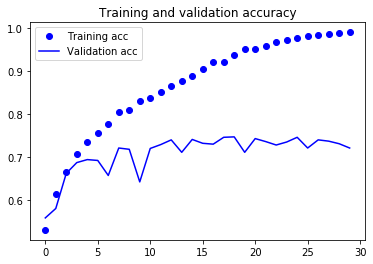

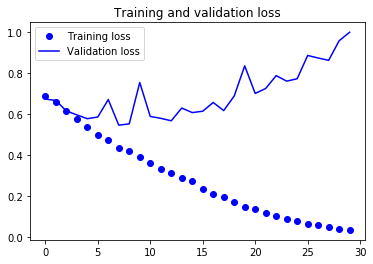

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 使用数据增强
`ImageDataGenerator` 

In [3]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,        # 图像随机旋转角度 0-180
      width_shift_range=0.2,    # 图像在水平或垂直方向平移范围 0-1 （相对于总宽度或总高度的比例 ）
      height_shift_range=0.2,   # 
      shear_range=0.2,          # 随机错切变换的角度
      zoom_range=0.2,           # 随机缩放的范围
      horizontal_flip=True,     # 随机将一半图像水平翻转。（如果没有不对称的假设，这样做是有意义的）
      fill_mode='nearest')      # 用于填充新像素的方法，这些新像素可能来自于旋转或高度\宽度平移

Using TensorFlow backend.


(150, 150, 3)

(1, 150, 150, 3)

<Figure size 432x288 with 0 Axes>

(1, 150, 150, 3)

<Figure size 432x288 with 0 Axes>

(1, 150, 150, 3)

<Figure size 432x288 with 0 Axes>

(1, 150, 150, 3)

<Figure size 432x288 with 0 Axes>

(1, 150, 150, 3)

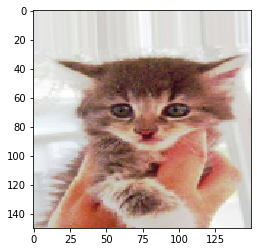

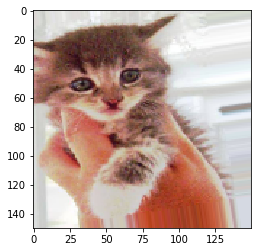

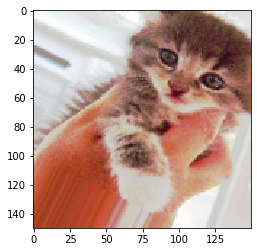

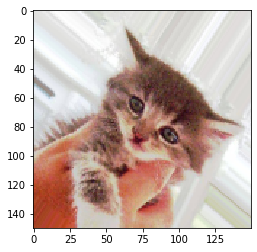

In [48]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)                             #    x.shape(150, 150, 3)
x = x.reshape((1,) + x.shape)                           #    x.shape(1, 150, 150, 3)
i = 0
for batch in datagen.flow(x, batch_size=1):             #    x.shape(sample,high,with,channel)
    plt.figure(i)
    batch.shape
    imgplot = plt.imshow(image.array_to_img(batch[0]))  # batch.shape(sample,high,with,channel)
    i += 1
    if i % 4 == 0:
        break

plt.show()

数据增强的输入仍然是高度相关的，无法生成新的信息，只能混合现有信息。因此，不足以完全消除过拟合。我们添加Dropout层来进一步降低过拟合。

In [4]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))   # 数据增强添加 Dropoout 层
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)   # 不要增强验证数据

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
	 [[{{node loss/mul}}]]

In [41]:
model.save('cats_and_dogs_small_2.h5')

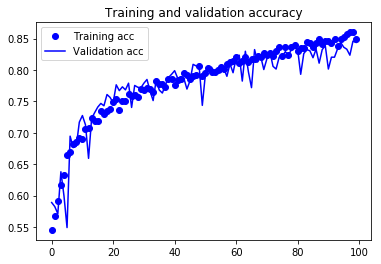

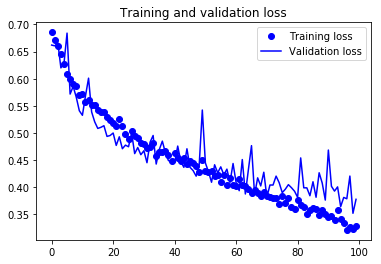

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()